Data shape: (1, 250, 250, 3)
Image shape: (250, 250, 3)
The image (Pillow):


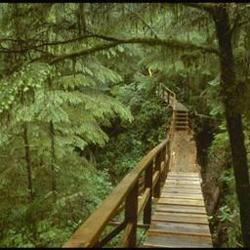

Min value: 0.0
Max value: 1.0


In [14]:
import numpy as np

from PIL import Image as PilImage
from omnixai.data.image import Image
from omnixai.preprocessing.image import Scale, Resize

img = Image(PilImage.open("./Dataset/ForestFire_dataset/test/NoFire/nofire_0041.jpg").convert('RGB'))
print(f"Data shape: {img.shape}")
print(f"Image shape: {img.image_shape}")
print(f"The image (Pillow):")
# `to_pil` returns a single Pillow image if `batch_size = 1` or a list of Pillow images if `batch_size > 1`.
display(img.to_pil())

# Scale pixel values
x = Scale().transform(img)
print(f"Min value: {np.min(x.values)}")
print(f"Max value: {np.max(x.values)}")

In [15]:
print(f"Numpy array shape: {img.to_numpy().shape}")
print(f"Numpy array shape: {img.to_numpy(keepdim=True).shape}")
print(f"Numpy array shape: {img.to_numpy(hwc=False, keepdim=True).shape}")

Numpy array shape: (1, 250, 250, 3)
Numpy array shape: (1, 250, 250, 3)
Numpy array shape: (1, 3, 250, 250)


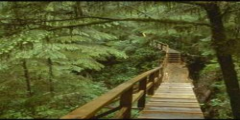

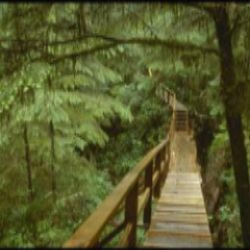

In [16]:
# Resize image
transform = Resize(size=(120, 240))
x = transform.transform(img)
display(x.to_pil())
y = transform.invert(x)
display(y.to_pil())

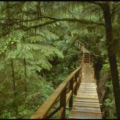

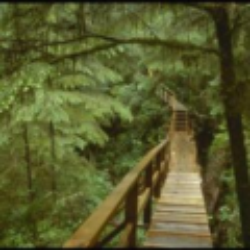

In [17]:
transform = Resize(size=120)
x = transform.transform(img)
display(x.to_pil())
y = transform.invert(x)
display(y.to_pil())

In [18]:
import json
import numpy as np
import tensorflow as tf
# from tensorflow.keras.applications import mobilenet_v2
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.preprocessing.image import Resize
from omnixai.explainers.vision.specific.gradcam import GradCAM

In [19]:
# Load the test image
img = Resize((224, 224)).transform(Image(PilImage.open("./Dataset/ForestFire_dataset/test/NoFire/nofire_0041.jpg").convert('RGB')))
# Load the class names
with open("imagenet_class_index.json", 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [20]:
# class_idx

In [21]:
idx2label = ["Fire", "NoFire"]

In [22]:
# Load the model
model_path = "./save_weights/224_ConvNet_on_ForestFire_dataset.h5"
test_model = tf.keras.models.load_model(model_path)
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 111, 111, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12100)             0         
                                                                 
 dropout (Dropout)           (None, 12100)             0         
                                                                 
 dense (Dense)               (None, 2)                 24202     
                                                        

Total params: 24,314
Trainable params: 24,314
Non-trainable params: 0
_________________________________________________________________


In [12]:
# The preprocessing function
def preprocess(images):
    data = []
    for i in range(len(images)):
        im = tf.keras.utils.img_to_array(images[i].to_pil())
        data.append(np.expand_dims(im, axis=0))
    data = np.concatenate(data, axis=0)
    # test_model.preprocess_input(data)
    return data

In [13]:
input_img = preprocess(img)
predictions = test_model.predict(input_img)
# top_indices = np.argsort(predictions)[0, ::-1][:5]
top_indices = np.argsort(predictions)[0][:2]
print(predictions, top_indices)
r = tuple((i, idx2label[i]) for i in top_indices)
print(r)

2023-12-27 02:05:27.812125: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-12-27 02:05:27.812691: E tensorflow/stream_executor/cuda/cuda_dnn.cc:398] Possibly insufficient driver version: 525.89.2
2023-12-27 02:05:27.812741: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Conv2D' defined at (most recent call last):
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/traitlets/config/application.py", line 1077, in launch_instance
      app.start()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_10946/4086654541.py", line 2, in <module>
      predictions = test_model.predict(input_img)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/root/miniconda3/envs/tf2.9/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential/conv2d/Conv2D'
DNN library is not found.
	 [[{{node sequential/conv2d/Conv2D}}]] [Op:__inference_predict_function_272]

In [26]:
explainer = GradCAM(
    model=test_model,
    target_layer=test_model.layers[-4],
    preprocess_function=preprocess
)
# Explain the top label
explanations = explainer.explain(img)
explanations.ipython_plot(index=0, class_names=idx2label)